In [1]:
#Importing the libraries
import math
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense , LSTM , Dropout
import yfinance as yf




In [2]:
#Importing the data
df = yf.download('HDFCBANK.NS', start= '2012-01-01', end= '2020-11-15')
#df = pd.read_csv('HDFCBANK.NS.csv')

[*********************100%***********************]  1 of 1 completed


In [3]:
df 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,214.449997,214.899994,209.750000,213.425003,197.498611,3514998
2012-01-03,215.699997,220.449997,215.000000,219.574997,203.189651,3439238
2012-01-04,220.949997,222.475006,215.425003,221.649994,205.109818,4871478
2012-01-05,222.000000,223.350006,220.149994,221.824997,205.271759,3380606
2012-01-06,220.500000,228.574997,219.475006,226.649994,209.736710,3977222
...,...,...,...,...,...,...
2020-11-10,1357.000000,1395.000000,1351.550049,1393.650024,1371.695557,20758678
2020-11-11,1399.900024,1414.800049,1370.500000,1389.949951,1368.053833,18058097
2020-11-12,1377.400024,1388.550049,1360.000000,1371.699951,1350.091187,13526974


In [4]:
df.shape

(2186, 6)

In [5]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil( len(dataset) * .8)

training_data_len


1749

In [6]:
data


,Close
Date,
2012-01-02,213.425003
2012-01-03,219.574997
2012-01-04,221.649994
2012-01-05,221.824997
2012-01-06,226.649994
...,...
2020-11-10,1393.650024
2020-11-11,1389.949951
2020-11-12,1371.699951


In [7]:

dataset

array([[ 213.42500305],
       [ 219.57499695],
       [ 221.6499939 ],
       ...,
       [1371.69995117],
       [1358.80004883],
       [1369.69995117]])

In [8]:
#Scaling the values between 0 to 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.        ],
       [0.00521087],
       [0.006969  ],
       ...,
       [0.98140179],
       [0.97047175],
       [0.9797072 ]])

<function matplotlib.pyplot.show(close=None, block=None)>

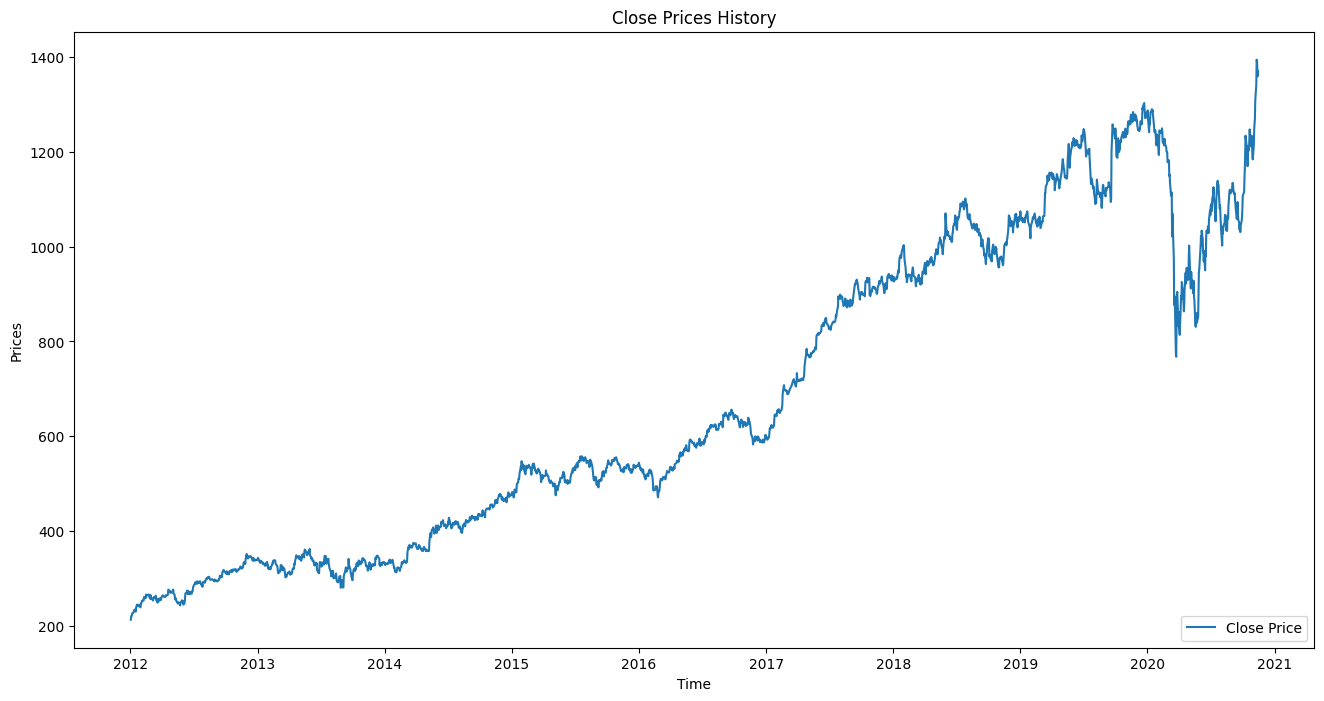

In [9]:
plt.figure(figsize=(16,8))
plt.title('Close Prices History')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.plot(df['Close'])

plt.legend(['Close Price'], loc='lower right')
plt.show

In [10]:
#train_open_scaled[60]

Below we will be taking previous 60 days open datasteps to predict the next values so we are converting the data as per our input in LTSM layers.
i.e for taking 0 to 59 days open price to get 60th day price as output, 1 to 60 for 61, 2 to 61 for 62

In [11]:
# Feature selection
train_data = scaled_data[0:training_data_len , :]
x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])



In [12]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [13]:
#Reshaping the train data to make it as input for LTSM layer input_shape(batchzise,timesteps,input_dim)
xtrain= np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
xtrain.shape

(1689, 60, 1)

### Building the LSTM Network

In [14]:
#initialisizng the model 
model= Sequential()

#First Input layer and LSTM layer
model.add(LSTM(50, return_sequences=True,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))

model.add(LSTM(50, kernel_initializer='glorot_uniform',return_sequences=False))

model.add(Dense(25))

model.add(Dense(1))

In [15]:
#Compiling the network
model.compile(optimizer='adam',loss='mean_squared_error')


#fitting the network
model.fit(x_train,y_train,batch_size=1,epochs=5)

Epoch 1/5
1689/1689 [==============================] - 71s 39ms/step - loss: 9.1652e-04
Epoch 2/5
1689/1689 [==============================] - 54s 32ms/step - loss: 4.0686e-04
Epoch 3/5
1689/1689 [==============================] - 57s 34ms/step - loss: 2.6924e-04
Epoch 4/5
1689/1689 [==============================] - 48s 28ms/step - loss: 2.7558e-04
Epoch 5/5
1689/1689 [==============================] - 41s 24ms/step - loss: 2.0302e-04


### Predicting for test data

As we have 60 input in our layer, we will concatenate our train and test and will take last 60 values of our training set with test set

In [16]:

test_data = scaled_data[training_data_len - 60: , :]

In [17]:
x_test= []
y_test= dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0]) #creating input for lstm prediction

In [18]:
x_test= np.array(x_test)

In [19]:
x_test.shape

(437, 60)

In [20]:
x_test= np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [21]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

14/14 [==============================] - 1s 21ms/step


In [22]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

27.773932286828174

### Plotting the data

C:\Users\tempu\AppData\Local\Temp\ipykernel_21212\4292948666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


<function matplotlib.pyplot.show(close=None, block=None)>

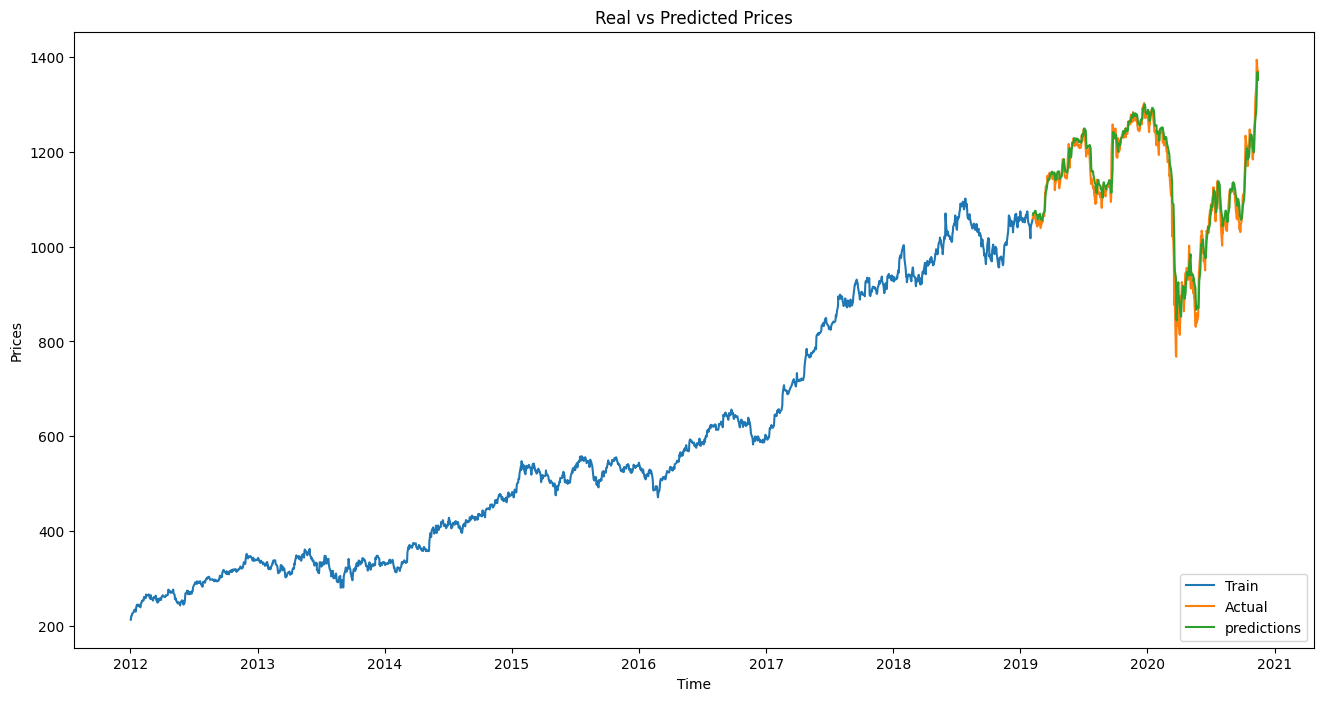

In [23]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Real vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])

plt.legend(['Train', 'Actual', 'predictions'], loc='lower right')
plt.show


In [24]:
valid

,Close,predictions
Date,,
2019-02-06,1061.324951,1066.717407
2019-02-07,1058.625000,1070.440552
2019-02-08,1061.324951,1070.390503
2019-02-11,1069.824951,1070.864502
2019-02-12,1064.849976,1074.984253
...,...,...
2020-11-10,1393.650024,1314.676880
2020-11-11,1389.949951,1352.840698
2020-11-12,1371.699951,1367.779297


In [25]:
#data.to_csv('predicted.csv')

In [26]:
stock_quote = yf.download('HDFCBANK.NS', start= '2012-01-01', end= '2020-11-17')

#Create new dataframe
new_df = stock_quote.filter(['Close'])
#Get last 60 days
last_60_days = new_df[-60:].values
#Scale data
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the last 60 days
X_test.append(last_60_days_scaled)
#Convert into numpy
X_test = np.array(X_test)
#reshape the data to 3D
X_test= np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1 ))
#Get prediction for 61st day
pred_price = model.predict(X_test)
#Undo Scaling
pred_price = scaler.inverse_transform(pred_price)
pred_price


[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 39ms/step


array([[1352.0208]], dtype=float32)

In [27]:
actual_quote = yf.download('HDFCBANK.NS', start= '2020-11-10', end= '2020-11-20')
actual_quote

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-10,1357.000000,1395.000000,1351.550049,1393.650024,1371.695557,20758678
2020-11-11,1399.900024,1414.800049,1370.500000,1389.949951,1368.053833,18058097
2020-11-12,1377.400024,1388.550049,1360.000000,1371.699951,1350.091187,13526974
2020-11-13,1368.800049,1368.800049,1347.000000,1358.800049,1337.394653,11236240
2020-11-14,1367.800049,1374.949951,1365.199951,1369.699951,1348.122803,917533
2020-11-17,1385.800049,1412.599976,1380.599976,1408.449951,1386.262329,15529950
2020-11-18,1403.000000,1419.000000,1399.050049,1408.699951,1386.508423,9431388
2020-11-19,1389.699951,1399.449951,1368.000000,1374.349976,1352.699585,10133441
